In [1]:
import numpy as np

In [2]:
a=np.asarray([1,2,3])
b=np.asarray([2,0,4])


In [3]:
# now fint euclidian distance 
l2=np.sum((b-a)**2)**0.5

In [4]:
#manhattan distance
l1=np.sum(abs(b-a))

In [5]:
#data Preaparing

In [6]:
import matplotlib.pyplot as plt

In [7]:
m1=[1,0]
cov1=[[1,01.],[0.1,2]]
dist1=np.random.multivariate_normal(m1,cov1,500)
#print(dist1)
m2=[4,5]
cov2=[[1,0.1],[0.1,2]]
dist2=np.random.multivariate_normal(m2,cov2,500)
print(dist2)

[[ 3.64958835  3.85451331]
 [ 4.71625396  5.96190192]
 [ 4.08799834  6.70648813]
 [ 3.20552847  4.6327504 ]
 [ 3.62105562  5.68853825]
 [ 4.25257636  4.65024063]
 [ 2.11314411  2.90406756]
 [ 4.44143139  3.86659747]
 [ 3.55622965  4.40598919]
 [ 5.1712079   4.64715751]
 [ 2.92271982  6.52768579]
 [ 3.55060907  3.89853243]
 [ 4.84667661  6.16014973]
 [ 3.94716432  5.56864297]
 [ 5.24608653  5.70445782]
 [ 2.2242229   5.83012908]
 [ 3.89803846  1.25140051]
 [ 4.69793827  5.22539744]
 [ 4.5773915   4.43727173]
 [ 4.65108535  4.60770391]
 [ 6.70519911  3.15923986]
 [ 3.40406117  3.98907655]
 [ 3.19058025  4.86114129]
 [ 3.57405071  4.86818339]
 [ 3.23362075  4.816989  ]
 [ 1.79236796  2.47790199]
 [ 3.84934745  3.13500735]
 [ 3.45886101  5.97927831]
 [ 3.93681856  8.29005166]
 [ 4.60930221  5.03638475]
 [ 4.8169076   5.78371354]
 [ 3.76539994  4.48706423]
 [ 4.63539183  4.62893703]
 [ 4.30980541  6.88728146]
 [ 4.76084508  4.81458672]
 [ 2.98749403  3.98808   ]
 [ 4.28701424  6.73977491]
 

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
#now set the limit and plot it inot a form of scatter 

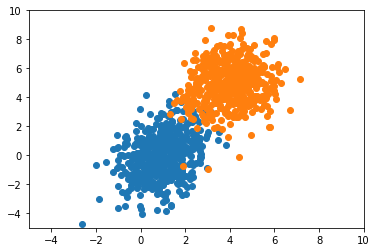

In [9]:
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.scatter(dist1[:,0],dist1[:,1])
plt.scatter(dist2[:,0],dist2[:,1])
plt.show()

In [10]:
data=np.zeros((1000,3))

In [11]:
data[:500, :2]=dist1
data[500: ,:2]=dist2
data[500: ,-1]= 1
data.shape

(1000, 3)

In [12]:
data.mean(axis=0)

array([2.45616058, 2.47556849, 0.5       ])

In [13]:
np.random.shuffle(data)
data[:10]

array([[ 0.24167272,  0.12376812,  0.        ],
       [-0.04175813,  0.6998796 ,  0.        ],
       [ 1.33504983,  2.86953783,  1.        ],
       [ 5.00199745,  6.76647404,  1.        ],
       [ 3.12134096,  4.52914723,  1.        ],
       [ 2.68119613,  1.17001945,  0.        ],
       [ 0.56418834,  1.7997632 ,  0.        ],
       [ 3.952502  ,  5.89166479,  1.        ],
       [ 1.48817848, -1.36186898,  0.        ],
       [ 0.34690306,  0.81938026,  0.        ]])

In [14]:
#knn algorithm 

In [15]:
def distance(a,b):
    return np.sum((a-b)**2)**0.5

In [16]:
def knn(x_train,y_train,test_point,k=7):
    
    distances=[]
    m=x_train.shape[0]
    for i in range(m):
        d = distance(x_train[i],test_point)
        distances.append([d,y_train[i]])
        
    sorted_labels = sorted(distances,key=lambda r:r[0])
    neighbors=np.asarray(sorted_labels)[:k,-1]
    #print(neighbors)
    
    freq = np.unique(neighbors, return_counts = True)
    index = freq[1].argmax()
    return freq[0][index]
    

In [17]:
x_train=data[:,:2]
y_train=data[:,-1]
test_point=np.array([4,0])
knn(x_train,y_train,test_point)

0.0

In [18]:
x_train=data[:,:2]
y_train=data[:,-1]
test_point=np.array([4,1])
knn(x_train,y_train,test_point)

0.0

In [19]:
# hyper parameter optimization for different value of k

In [20]:
x_train = data[:750,:2]
y_train= data[:750,-1]
x_test = data[750: ,:2]
y_test = data[750: ,-1]
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(750, 2) (750,)
(250, 2) (250,)


In [21]:
def acc(k):
    predictions = []
    m =x_test.shape[0]
    for i in range(m):
        test_points = x_test[i]
        pred_label = knn(x_train,y_train,test_point,k)
        predictions.append(pred_label)
    preds = np.asarray(predictions)
    #print (preds == y_test)
    
    return (preds == y_test).sum()/preds.shape[0]
    

In [ ]:
#acc(7)
for k in range(1,50):
    print(f"For k={k} Accuracy={acc(k)}")

For k=1 Accuracy=0.5
For k=2 Accuracy=0.5
For k=3 Accuracy=0.5
For k=4 Accuracy=0.5
For k=5 Accuracy=0.5
For k=6 Accuracy=0.5
For k=7 Accuracy=0.5
For k=8 Accuracy=0.5
For k=9 Accuracy=0.5
For k=10 Accuracy=0.5
For k=11 Accuracy=0.5
For k=12 Accuracy=0.5
For k=13 Accuracy=0.5
For k=14 Accuracy=0.5
For k=15 Accuracy=0.5
For k=16 Accuracy=0.5
For k=17 Accuracy=0.5
For k=18 Accuracy=0.5
For k=19 Accuracy=0.5
For k=20 Accuracy=0.5
For k=21 Accuracy=0.5
For k=22 Accuracy=0.5
For k=23 Accuracy=0.5
For k=24 Accuracy=0.5
For k=25 Accuracy=0.5
For k=26 Accuracy=0.5
For k=27 Accuracy=0.5
For k=28 Accuracy=0.5
For k=29 Accuracy=0.5
For k=30 Accuracy=0.5
For k=31 Accuracy=0.5
For k=32 Accuracy=0.5
For k=33 Accuracy=0.5
For k=34 Accuracy=0.5
For k=35 Accuracy=0.5
For k=36 Accuracy=0.5
For k=37 Accuracy=0.5
